In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [3]:
!mkdir drive
!google-drive-ocamlfuse drive

In [5]:
import os 
os.chdir("/content/drive/Colab_Notebooks/23december")
!pwd

/content/drive/Colab_Notebooks/23december


In [6]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.layers.core import Activation
from keras.layers.core import Dropout

from tensorflow.keras.utils import plot_model
from IPython.display import Image

from keras.datasets import mnist

from keras.utils.np_utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt


In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x train dataset:", x_train.shape)
print("y train dataset:", y_train.shape)
print("y:",y_train[0],y_train[1],y_train[2],y_train[3],y_train[4],y_train[5])
print("x test dataset:", x_test.shape)
print("y test dataset:", y_test[1],y_test[2],y_test[3], y_test[4], y_test[5])

y_train_ohe = to_categorical(y_train)
print("ohe for y_train",y_train_ohe.shape)



11493376/11490434 [==============================] - 0s 0us/step
x train dataset: (60000, 28, 28)
y train dataset: (60000,)
y: 5 0 4 1 9 2
x test dataset: (10000, 28, 28)
y test dataset: 2 1 0 4 1
ohe for y_train (60000, 10)


In [8]:
def creating_model(X_train,X_test,y_train,y_test,epoch,batch):

  #input handling 
  x_train = X_train
  y_train = y_train
  x_test = X_test
  y_test = y_test
  #transform one hot encoding (0,1,2,3,4,5,6,7,8,9)
  y_train_ohe = to_categorical(y_train)

  #creating model
  model = Sequential()

  model.add(Dense(input_dim = x_train.shape[1],
                units = 50,
                kernel_initializer='uniform',
                activation = 'tanh'))
  
  model.add(Dense(50, kernel_initializer='uniform'))
  model.add(Activation('tanh'))
  model.add(Dropout(0.5))
  model.add(Dense(50, kernel_initializer='uniform'))
  model.add(Activation('relu'))

  model.add(Dense(10, kernel_initializer='uniform'))
  model.add(Activation('softmax'))
  
  #optimizer: stochastic gradient descent!
  sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
  
  #model compiler 
  #loss function: categorical_crossentropy
  #extra metric 'accuracy' except from val_acc, loss, val_loss
  model.compile(loss = 'categorical_crossentropy',
              optimizer = sgd,
              metrics=["accuracy"])

  epochs= epoch
  batch_size = batch
  modelhistory = []
  #let's train
  modelhistory = model.fit(x_train,
          y_train_ohe,
          batch_size,
          epochs,
          validation_split = 0.1,   #validation ratio 1/10
          verbose = 1)

  #prediction for this model
  y_test_predictions = model.predict_classes(x_test, verbose = 1)

  print("y_test_predictions", y_test_predictions, "len", len(y_test_predictions))
  correct = np.sum(y_test_predictions ==  y_test)
  print ('Test Accuracy: %.2f%%' % (correct/float(y_test.shape[0])*100.0) )

  #model structure
  plot_model(model, to_file='./model_plot.png', show_shapes=True, show_layer_names=True)

  return model, modelhistory

In [9]:
def plot(acc,val_acc,loss,val_loss, epochs):
  acc_history = acc 
  val_acc = val_acc
  loss = loss
  val_loss = val_loss

  epochs = epochs
  x_range = []

  for i in range (epochs):
    x_range = x_range + [i+1]

  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.suptitle('MNIST MODEL RESULT\n')
  ax1.plot(x_range,acc_history)
  ax1.plot(x_range,val_acc)
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Accuracy')
  ax1.set_title('epoch vs accuracy ')
  ax1.legend(["accuracy","validation_accuracy"])


  ax2.plot(x_range,loss)
  ax2.plot(x_range,val_loss)
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Loss')
  ax2.set_title('epoch vs loss ')
  ax2.legend(["loss","validation_loss"])
  
  fig.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.savefig("./result.PNG")
  plt.show()




In [10]:
def dataset(x_data):
  l = x_data
  for x in range (len(l)):
    plt.subplot(4,5,x+1),plt.imshow(x_data[x], cmap=plt.get_cmap('gray')), plt.xticks([]), plt.yticks([])
  plt.tight_layout()
  plt.savefig("./training_set.PNG")
  plt.show()
  

code executed
maincode


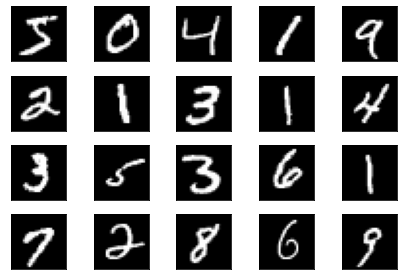

Epoch 1/150
135/135 [==============================] - 3s 6ms/step - loss: 2.3021 - accuracy: 0.1317 - val_loss: 2.3006 - val_accuracy: 0.1258
Epoch 2/150
135/135 [==============================] - 1s 4ms/step - loss: 2.3002 - accuracy: 0.1334 - val_loss: 2.2985 - val_accuracy: 0.1127
Epoch 3/150
135/135 [==============================] - 0s 3ms/step - loss: 2.2979 - accuracy: 0.1248 - val_loss: 2.2955 - val_accuracy: 0.1113
Epoch 4/150
135/135 [==============================] - 0s 3ms/step - loss: 2.2945 - accuracy: 0.1259 - val_loss: 2.2908 - val_accuracy: 0.1245
Epoch 5/150
135/135 [==============================] - 0s 4ms/step - loss: 2.2891 - accuracy: 0.1377 - val_loss: 2.2826 - val_accuracy: 0.1618
Epoch 6/150
135/135 [==============================] - 0s 3ms/step - loss: 2.2800 - accuracy: 0.1732 - val_loss: 2.2672 - val_accuracy: 0.2483
Epoch 7/150
135/135 [==============================] - 0s 3ms/step - loss: 2.2606 - accuracy: 0.2355 - val_loss: 2.2341 - val_accuracy: 0.3077

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


313/313 [==============================] - 0s 1ms/step
y_test_predictions [7 2 1 ... 4 5 6] len 10000
Test Accuracy: 94.43%


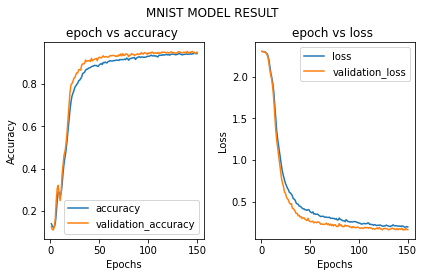

In [11]:
def main(): 

  print("maincode")
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  dataset(x_train[0:20])

  X_train = x_train.reshape(60000, 784)
  X_test = x_test.reshape(10000, 784)

  epochs = 150
  batch_size = 400
  
  model, history = creating_model(X_train,X_test,y_train,y_test,epochs,batch_size)

  acc=history.history['accuracy']
  val_acc= history.history['val_accuracy'] 
  loss= history.history['loss'] 
  val_loss= history.history['val_loss'] 

  plot(acc,val_acc,loss,val_loss, epochs)



if __name__ == '__main__':
  print('code executed')
  main()

#run different main source
else:
  print("code executed by other main running progress")



*the last section when code running:*

Epoch 1/150
135/135 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.1109 - val_loss: 2.3005 - val_accuracy: 0.1228

Epoch 2/150
135/135 [==============================] - 0s 3ms/step - loss: 2.3000 - accuracy: 0.1418 - val_loss: 2.2977 - val_accuracy: 0.1082

Epoch 3/150
135/135 [==============================] - 0s 3ms/step - loss: 2.2973 - accuracy: 0.1272 - val_loss: 2.2941 - val_accuracy: 0.1087

Epoch 4/150
135/135 [==============================] - 0s 3ms/step - loss: 2.2937 - accuracy: 0.1312 - val_loss: 2.2887 - val_accuracy: 0.1405

... ... ...

Epoch 143/150
135/135 [==============================] - 0s 3ms/step - loss: 0.1827 - accuracy: 0.9469 - val_loss: 0.1621 - val_accuracy: 0.9550

Epoch 144/150
135/135 [==============================] - 0s 3ms/step - loss: 0.1906 - accuracy: 0.9470 - val_loss: 0.1550 - val_accuracy: 0.9562

Epoch 145/150
135/135 [==============================] - 0s 3ms/step - loss: 0.1897 - accuracy: 0.9458 - val_loss: 0.1599 - val_accuracy: 0.9545

Epoch 146/150
135/135 [==============================] - 0s 3ms/step - loss: 0.1924 - accuracy: 0.9452 - val_loss: 0.1649 - val_accuracy: 0.9538

Epoch 147/150
135/135 [==============================] - 0s 3ms/step - loss: 0.1827 - accuracy: 0.9471 - val_loss: 0.1516 - val_accuracy: 0.9560

Epoch 148/150
135/135 [==============================] - 0s 3ms/step - loss: 0.1814 - accuracy: 0.9484 - val_loss: 0.1605 - val_accuracy: 0.9577

Epoch 149/150
135/135 [==============================] - 0s 3ms/step - loss: 0.1877 - accuracy: 0.9467 - val_loss: 0.1510 - val_accuracy: 0.9578

Epoch 150/150
135/135 [==============================] - 0s 3ms/step - loss: 0.1872 - accuracy: 0.9478 - val_loss: 0.1560 - val_accuracy: 0.9535

y_test_predictions [7 2 1 ... 4 5 6]  len(y_test_prediction):10000

Test Accuracy: 94.90%

